<a href="https://colab.research.google.com/github/annie-lyu/word-embedding/blob/master/Copy_of_hac_with_wordvecs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import glob
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
import gensim.models as g
import logging
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedLineDocument, TaggedDocument
import scipy as s
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy
import numpy as np
import gensim
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from gensim.models import Doc2Vec
from sklearn.neighbors import NearestCentroid
from scipy import spatial
from sklearn.metrics.pairwise import cosine_distances
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt


In [96]:
model = g.doc2vec.Doc2Vec.load("/content/drive/My Drive/test/model_6k_cor.bin")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
data_syn = np.delete(model.wv.syn0, 9547,0)
data_ind = np.delete(model.wv.index2word, 9547,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


In [97]:
data_syn = model.wv.syn0
data_ind = model.wv.index2word

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


In [98]:
## hac
## agglomerative clustering with scikit learn


hac = AgglomerativeClustering(affinity = "cosine", linkage = "complete", distance_threshold=0, n_clusters=None).fit(data_syn)


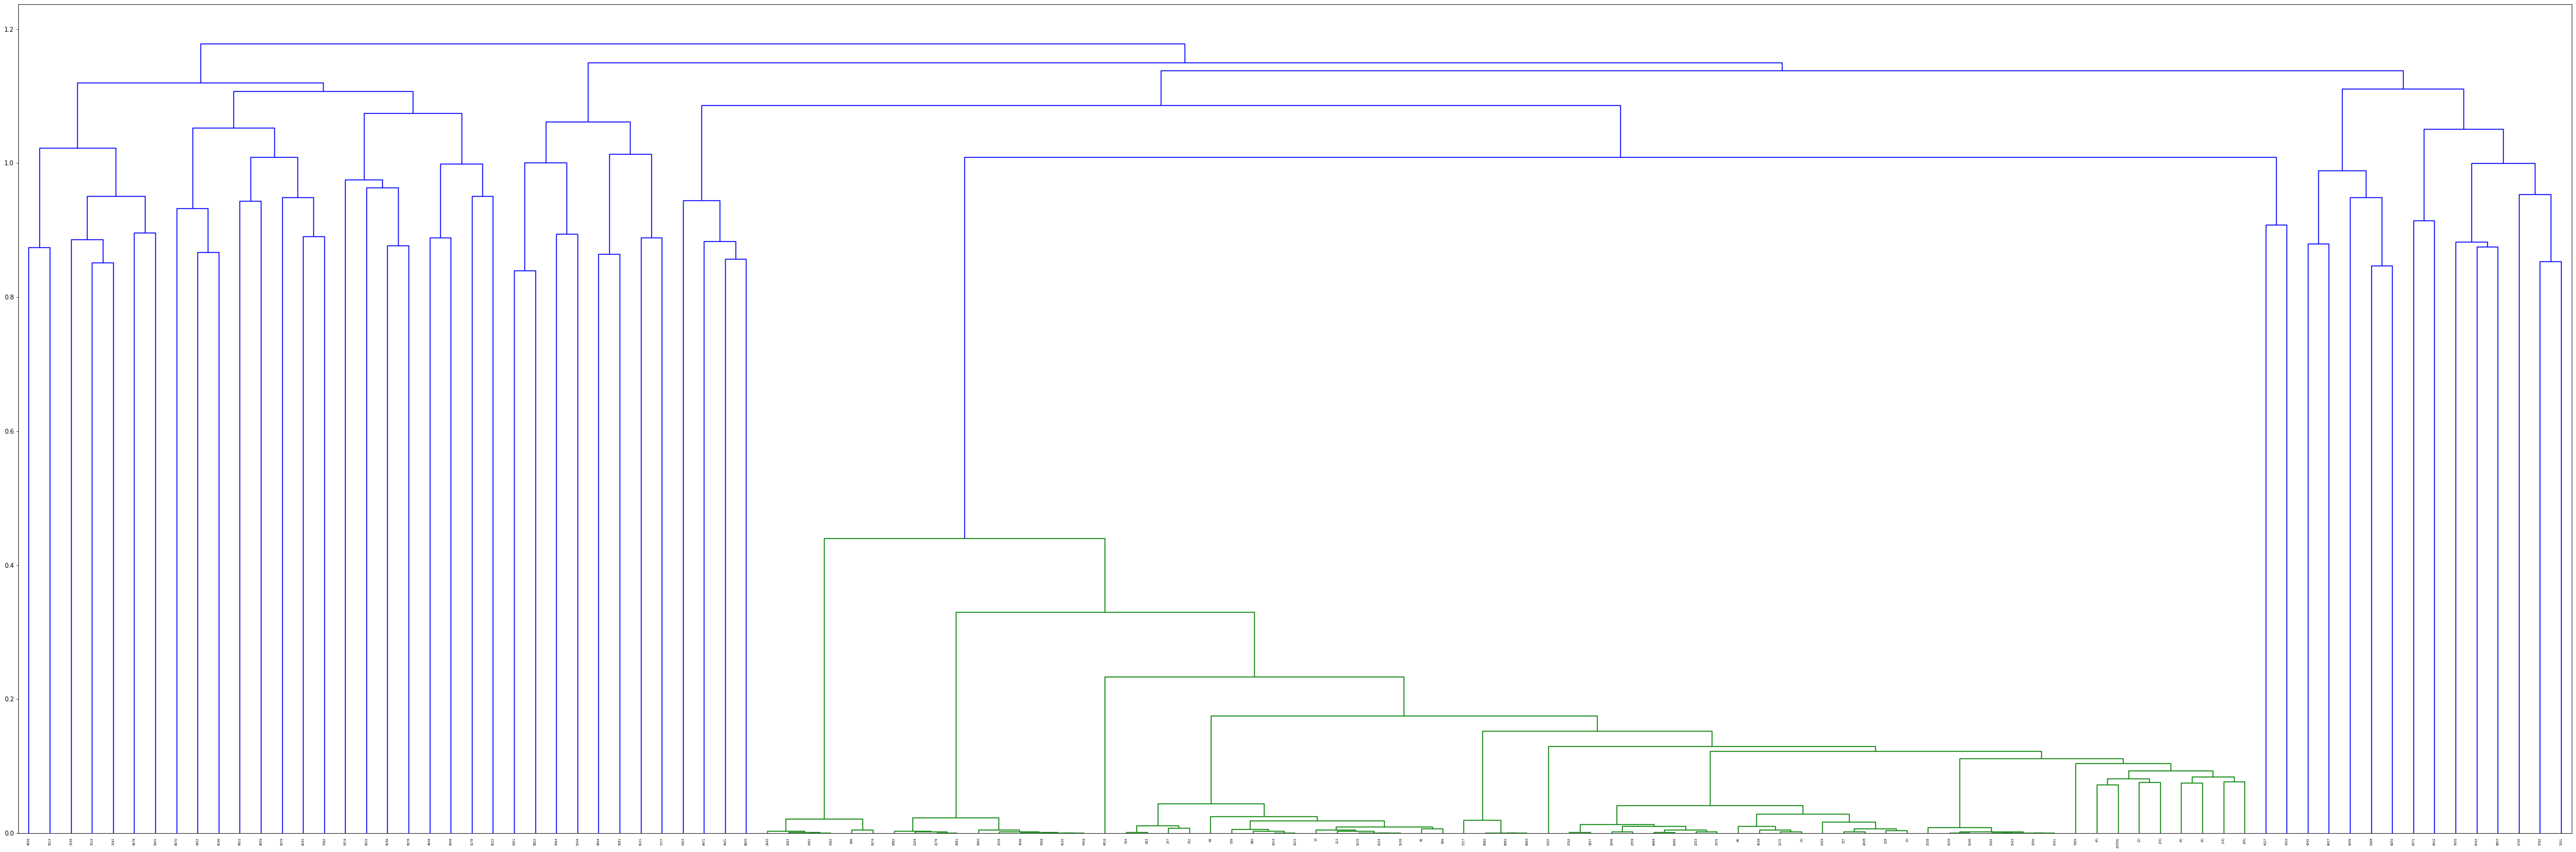

In [99]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
#create linkage matrix
counts = np.zeros(hac.children_.shape[0])
n_samples = len(hac.labels_)

for i, merge in enumerate(hac.children_):
  current_count = 0
  for child_idx in merge:
    if child_idx < n_samples:
      current_count += 1  # leaf node
    else:
      current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack([hac.children_, hac.distances_, counts]).astype(float)

plt.figure(figsize=(75, 25))
dendrogram(linkage_matrix, truncate_mode='level',p = 16)
plt.savefig('/content/drive/My Drive/test/reddit hac dendrogram.png')

In [100]:
hac_avg = AgglomerativeClustering(affinity = "cosine", linkage = "average", distance_threshold=0, n_clusters=None).fit(data_syn)

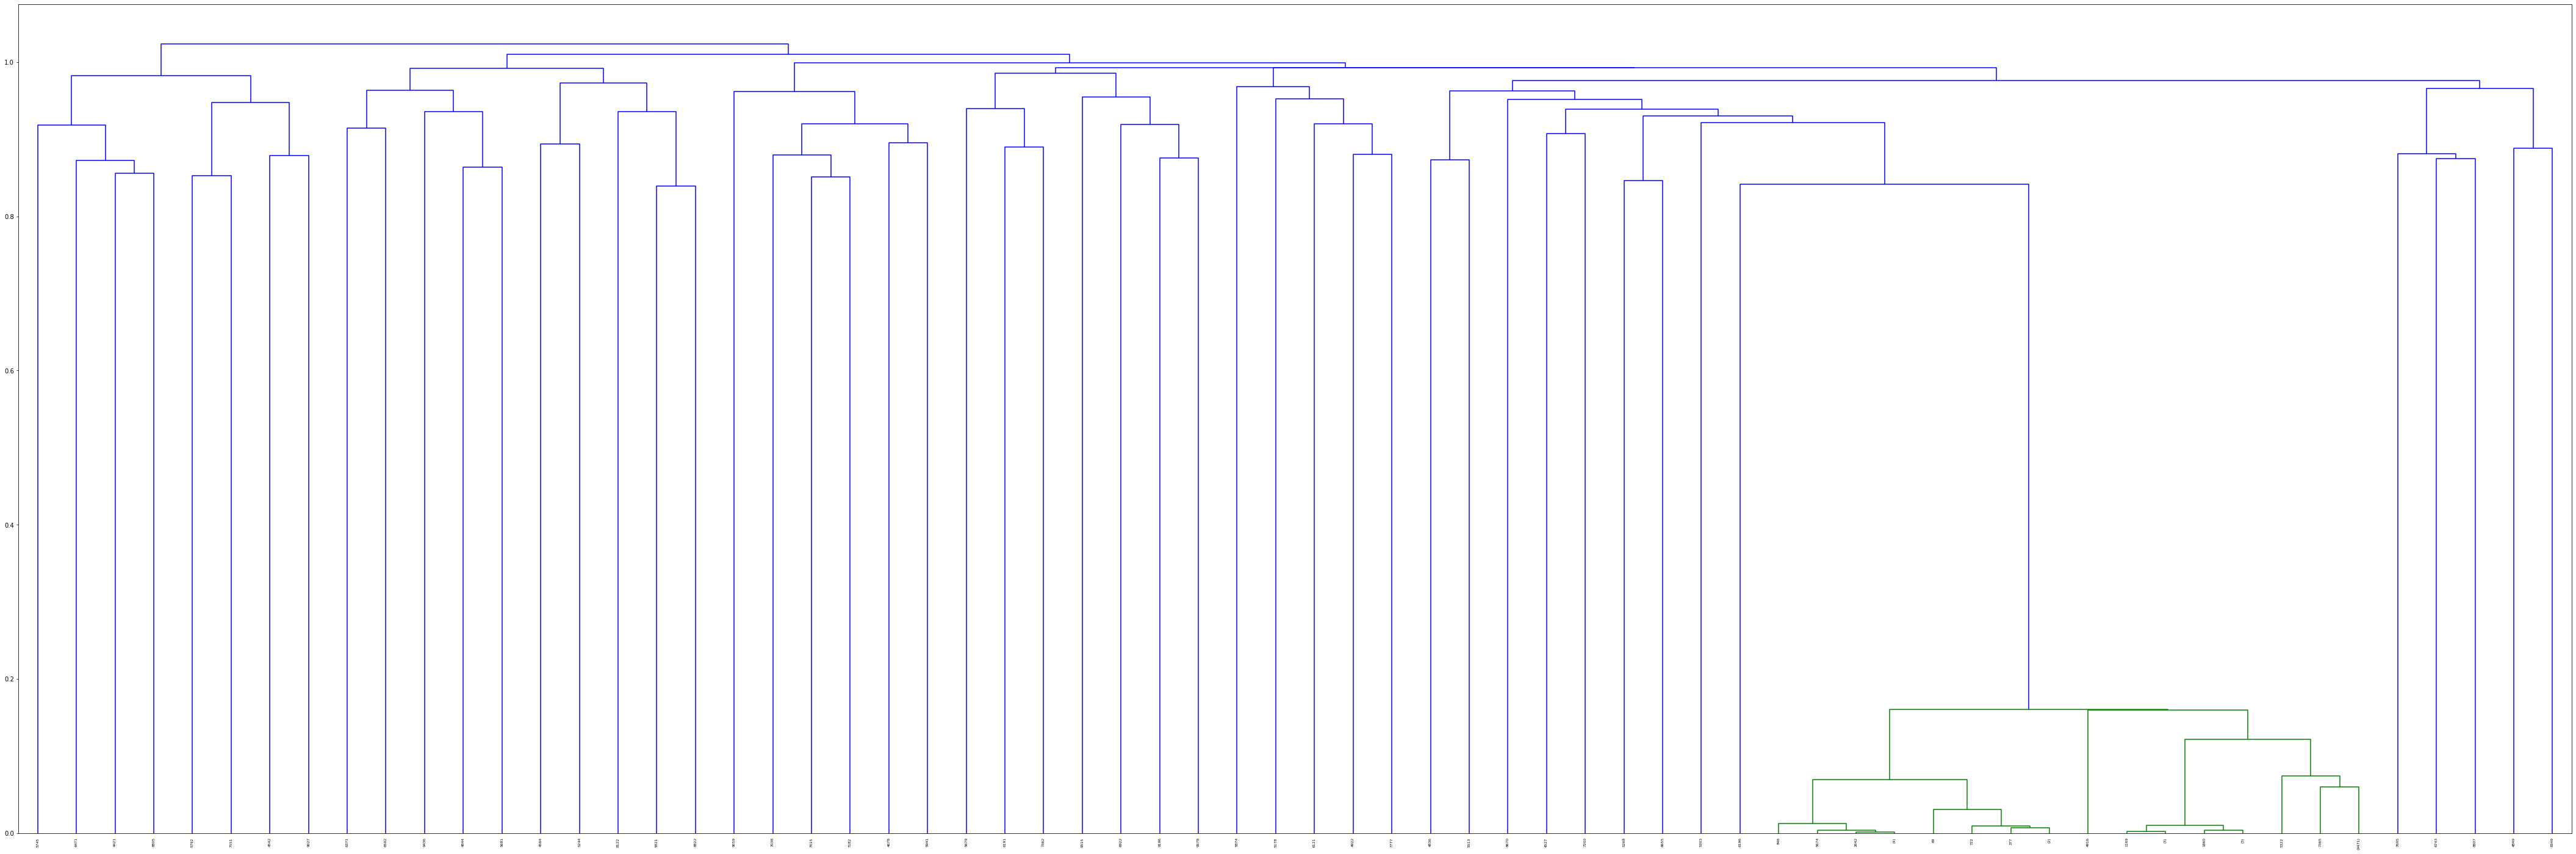

In [101]:
counts_avg = np.zeros(hac_avg.children_.shape[0])
n_samples_avg = len(hac_avg.labels_)

for i, merge in enumerate(hac_avg.children_):
  current_count = 0
  for child_idx in merge:
    if child_idx < n_samples_avg:
      current_count += 1  # leaf node
    else:
      current_count += counts[child_idx - n_samples_avg]
    counts_avg[i] = current_count

linkage_matrix_avg = np.column_stack([hac_avg.children_, hac_avg.distances_, counts_avg]).astype(float)

plt.figure(figsize=(75, 25))
dendrogram(linkage_matrix_avg, truncate_mode='level',p = 16)
plt.savefig('/content/drive/My Drive/test/reddit hac_avg dendrogram.png')

In [ ]:
#len(cluster_2_lab == 0)
len([i for i in range(9579) if cluster_2_lab[i] == 1])

23

In [ ]:
cluster_2_avg = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average')  
cluster_2_lab_avg = cluster_2_avg.fit_predict(data_syn)


In [ ]:
len([i for i in range(9579) if cluster_2_lab_avg[i] == 1])

8

In [ ]:
[data_ind[i] for i in range(9547) if cluster_2_lab[i] == 1]

['japan',
 'meadowdaaaaaaaaaaaaaaaleeeeee',
 'tew',
 'conflicted',
 'sknsh',
 'jerks',
 'misdemeanour',
 'toshiba',
 'cries',
 'meespeltt',
 'geffen',
 'tbp',
 'balder',
 'seeping',
 'preach',
 'lollo',
 'spirit',
 'gg',
 'madagascar',
 'churchgoer',
 'baker',
 'woooooooooooooooooooooooooo']

In [ ]:
[data_ind[i] for i in range(9547) if cluster_2_lab_avg[i] == 1]

['halftime',
 'overheads',
 'ratio',
 'easton',
 'murderer',
 'karmawhoring',
 'rebate',
 'ahem']

In [73]:
cluster_20_avg = AgglomerativeClustering(n_clusters=20, affinity='cosine', linkage='average')  
cluster_20_lab_avg = cluster_20_avg.fit_predict(data_syn)

In [92]:
len([i for i in range(9579) if cluster_20_lab_avg[i] == 2])

9535

In [ ]:
def colouring(data, c_label, components = 2, azim = 30, elev = 10, outliers = None, fn = None):
  if outliers is not None:
      c_label = np.delete(c_label, outliers, 0)
      data = np.delete(data, outliers, 0)
  
  pca = PCA(n_components=components).fit(data)
  datapoint = pca.transform(data)
  %matplotlib inline
  plt.figure
  label1 = ["gray", "orange", "deepskyblue", "crimson", "cornflowerblue", 
          "mediumseagreen", "gold", "salmon", "palegreen", "mediumslateblue",
          "teal", "olivedrab", "peachpuff", "black", "navajowhite",
          "mediumaquamarine", "blueviolet", "cyan", "greenyellow", "peru",
          "red", "purple", "pink", "olive", "brown"]
  if components == 2:
    for i in range(len(set(c_label))):
      x = [datapoint[:,0][j] for j in range(len(c_label)) if c_label[j] == i]
      y = [datapoint[:,1][k] for k in range(len(c_label)) if c_label[k] == i]
      name = "cluster" + str(list(set(c_label))[i])
      plt.plot(x, y, marker="o", linestyle="", c = label1[i], label=name)
    plt.legend()
    plt.savefig(fn)
    plt.show()
  if components == 3:
    ax = plt.axes(projection='3d')
    for i in range(len(set(c_label))):
      x = [datapoint[:,0][j] for j in range(len(c_label)) if c_label[j] == i]
      y = [datapoint[:,1][k] for k in range(len(c_label)) if c_label[k] == i]
      z = [datapoint[:,2][l] for l in range(len(c_label)) if c_label[l] == i]
      name = "cluster" + str(list(set(c_label))[i])
      plt.plot(x, y, marker="o", linestyle="", c = label1[i], label=name)
      ax.view_init(azim, elev)
    plt.legend()
    plt.savefig(fn)
    plt.show()
    

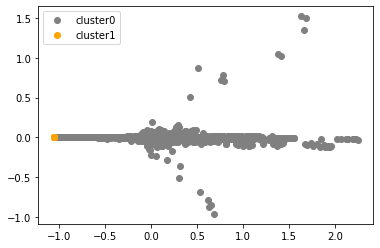

In [ ]:
colouring(data_syn, cluster_2_lab, fn = '/content/drive/My Drive/test/reddit hac 2.png')

In [ ]:
def compute_cosine_distance(data, centroids):
  distances = cosine_distances(data, [centroids])
  return (np.squeeze(distances))

In [ ]:
def top_words(distances, ind2word, n):
  ind = np.argsort(distances)[0:n]
  w = [ind2word[k] for k in ind]
  return w

In [ ]:
def cluster_latent_topic (cl, data, labels, centroids, ind2word, top_n):
  for i in range(cl):
    d = compute_cosine_distance(data, centroids[i])
    size = len([j for j in range(len(labels)) if labels[j] == i])
    if size >= top_n:
      n = top_n
    else:
      n = size
    word_list = top_words(d, ind2word, n)
    print("Top", top_n, "words for cluster", i, ":", word_list)

In [ ]:
X = data_syn
y2 = cluster_2_lab
clf2 = NearestCentroid(metric = 'cosine')
clf2.fit(X, y2)

cluster_latent_topic(cl=2, data = data_syn, labels = cluster_2_lab, centroids = clf2.centroids_, ind2word = data_ind, top_n = 25)

Top 25 words for cluster 0 : ['australia', 'survey', 'cadell', 'likes', 'twitter', 'funnier', 'british', 'prescribe', 'incompatible', 'sting', 'duly', 'nit', 'lgb', 'operation', 'underscore', 'revolutionary', 'unspecified', 'hometown', 'cobb', 'monk', 'shropshire', 'beaky', 'picard', 'reactionaries', 'freaky']
Top 25 words for cluster 1 : ['preach', 'balder', '\x00', 'japan', 'jerks', 'gg', 'baker', 'tbp', 'seeping', 'geffen', 'lollo', 'conflicted', 'cries', 'tew', 'toshiba', 'churchgoer', 'misdemeanour', 'meespeltt', 'woooooooooooooooooooooooooo', 'sknsh', 'meadowdaaaaaaaaaaaaaaaleeeeee', 'madagascar', 'spirit']


/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/_nearest_centroid.py:145: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn("Averaging for metrics other than "


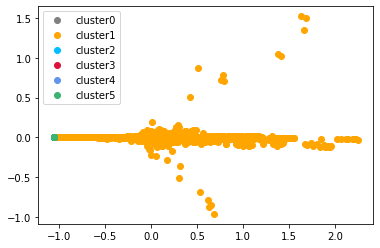

In [ ]:
cluster_6 = AgglomerativeClustering(n_clusters=6, affinity='cosine', linkage='complete')  
cluster_6_lab = cluster_6.fit_predict(data_syn)
#colouring(data_syn, cluster_6_lab, components=3, azim = 30, elev = 120)

colouring(data_syn, cluster_6_lab, fn =  '/content/drive/My Drive/test/reddit hac 6 2d.png')



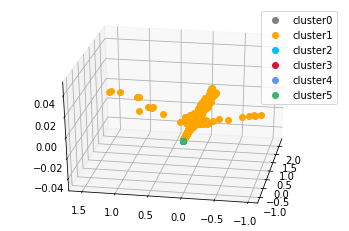

In [ ]:
colouring(data_syn, cluster_6_lab, components = 3, elev = 190, fn =  '/content/drive/My Drive/test/reddit hac 6 3d.png')

In [ ]:
[data_ind[i] for i in range(9579) if cluster_6_lab[i] != 1]

['overheads',
 'mccourt',
 'japan',
 'meadowdaaaaaaaaaaaaaaaleeeeee',
 'penis',
 'tew',
 'conflicted',
 'sknsh',
 'catholic',
 'waaaaariorss',
 'jerks',
 'misdemeanour',
 'crohn',
 'ratio',
 'easton',
 'stroke',
 'toshiba',
 'cries',
 'goodies',
 'meespeltt',
 'geffen',
 'conscripted',
 'roy',
 'arr',
 'meteor',
 'tbp',
 'balder',
 'seeping',
 'preach',
 'lollo',
 'karmawhoring',
 'plotting',
 'rectum',
 'spirit',
 'gg',
 'madagascar',
 'huehuehue',
 'vt',
 'ahem',
 'churchgoer',
 'baker',
 'pls',
 'woooooooooooooooooooooooooo',
 '\x00']

In [93]:
[data_ind[i] for i in range(9579) if cluster_20_lab_avg[i] != 2]

['halftime',
 'overheads',
 'mccourt',
 'japan',
 'meadowdaaaaaaaaaaaaaaaleeeeee',
 'penis',
 'tew',
 'conflicted',
 'sknsh',
 'catholic',
 'jerks',
 'misdemeanour',
 'crohn',
 'ratio',
 'easton',
 'stroke',
 'toshiba',
 'cries',
 'goodies',
 'meespeltt',
 'conscripted',
 'murderer',
 'roy',
 'meteor',
 'tbp',
 'balder',
 'seeping',
 'preach',
 'lollo',
 'karmawhoring',
 'plotting',
 'rectum',
 'spirit',
 'gg',
 'madagascar',
 'rebate',
 'huehuehue',
 'vt',
 'ahem',
 'churchgoer',
 'baker',
 'pls',
 'woooooooooooooooooooooooooo',
 '\x00']

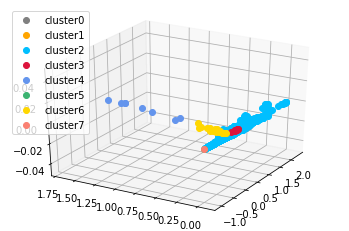

In [ ]:
colouring(data_syn, cluster_8_lab, components=3, azim = 30, elev = 210)

In [ ]:
outlier_ind = [i for i in range(9579) if cluster_6_lab[i] != 1]


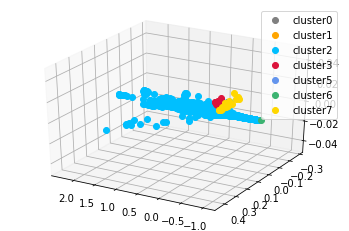

In [ ]:
cluster_8 = AgglomerativeClustering(n_clusters=8, affinity='cosine', linkage='complete')  
cluster_8_lab = cluster_8.fit_predict(data_syn)
cluster_8_lab1 = np.delete(cluster_8_lab, cluster1_ind, 0)
colouring(data_syn, cluster_8_lab, outliers = cluster1_ind, components=3, azim = 30, elev = 120)

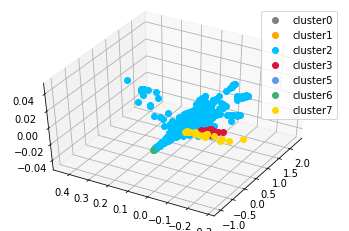

In [ ]:
colouring(data_syn, cluster_8_lab, outliers = cluster1_ind,components=3, elev = 210, azim = 45)

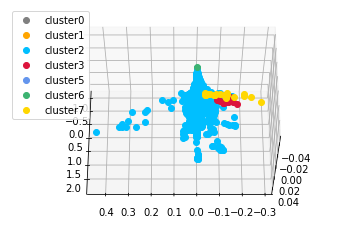

In [ ]:
colouring(data_syn, cluster_8_lab, outliers = cluster1_ind, components=3, elev = 0, azim = 300)

In [ ]:
y8 = cluster_8_lab
clf8 = NearestCentroid(metric = 'cosine')
clf8.fit(data_syn, y8)

cluster_latent_topic(cl=8, data = data_syn, labels = cluster_8_lab, centroids = clf8.centroids_, ind2word = data_ind, top_n = 20)


/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/_nearest_centroid.py:145: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn("Averaging for metrics other than "


Top 20 words for cluster 0 : ['kinds', 'food', 'deal', 'office', 'serving', 'supplying', 'requirements', 'forgot', 'company', 'terrible', 'stick', 'business', 'melbourne']
Top 20 words for cluster 1 : ['ah', 'brothers', 'mole', 'head', 'whack', 'risky', 'couple', 'mar', 'necromancy', 'plissken', 'true', 'sociopathic', 'embarrassed', 'hammer', 'overcome', 'gimme', 'hear', 'styles', 'tesskyrim', 'looking']
Top 20 words for cluster 2 : ['consultant', 'noted', 'duly', 'squid', 'conditions', 'vernon', 'progress', 'survey', 'cadell', 'anand', 'dinosaur', 'sir', 'movement', 'screwed', 'goddammit', 'caribbean', 'hangar', 'pension', 'derby', 'drove']
Top 20 words for cluster 3 : ['mirror', 'mp', 'nfl', 'cle', 'fln', 'gel', 'highlights', 'films', 'yd', 'reg', 'min', 'ng']
Top 20 words for cluster 4 : ['src', 'molla', 'add-on', 'block', 'firebox', 'add-ons', 'org', 'en']
Top 20 words for cluster 5 : ['hipster']
Top 20 words for cluster 6 : ['plus', 'find', 'wikipedia', 'lists', 'compass', 'filter

In [ ]:
type(cluster_8_lab)

numpy.ndarray

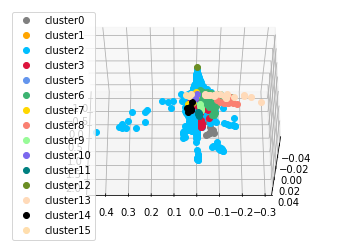

In [ ]:
cluster_16 = AgglomerativeClustering(n_clusters=16, affinity='cosine', linkage='complete')  
cluster_16_lab = cluster_16.fit_predict(data_syn)

colouring(data_syn, cluster_16_lab, outliers = cluster1_ind, components = 3, azim = 300, elev = 0)



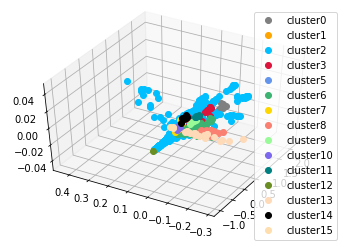

In [ ]:
colouring(data_syn, cluster_16_lab, outliers = cluster1_ind, components = 3, azim = 45, elev = 210)

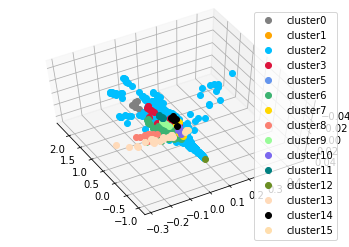

In [ ]:
colouring(data_syn, cluster_16_lab, outliers = cluster1_ind, components = 3, azim = 300, elev = 210)

In [ ]:
y16 = cluster_16_lab
clf16 = NearestCentroid(metric = 'cosine')
clf16.fit(data_syn, y16)

cluster_latent_topic(cl=16, data = data_syn, labels = cluster_16_lab, centroids = clf16.centroids_, ind2word = data_ind, top_n = 15)

/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/_nearest_centroid.py:145: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn("Averaging for metrics other than "


Top 15 words for cluster 0 : ['flu', 'gaftcv', 'buhpnbcyaossdkp', 'ujyxvmfsqcrb', 'q', 'andgctubuyb', 'marquee', 'ten', 'respectable', 'encrypted', 'approximately', 'conservatives', 'kennard', 'outta', 'politics']
Top 15 words for cluster 1 : ['brothers', 'mole', 'hawk', 'head', 'ah', 'freshman', 'nail', 'couple', 'del', 'smoky', 'scary', 'sociopathic', 'true', 'laughter', 'nic']
Top 15 words for cluster 2 : ['consultant', 'noted', 'duly', 'squid', 'conditions', 'vernon', 'progress', 'survey', 'cadell', 'sir', 'dinosaur', 'anand', 'movement', 'screwed', 'goddammit']
Top 15 words for cluster 3 : ['fights', 'chases', 'shake', 'copied', 'rooftop', 'scenes', 'became', 'casino', 'bond', 'serious', 'exact', 'royale', 'close', 'solace', 'quantum']
Top 15 words for cluster 4 : ['src', 'molla', 'add-on', 'block', 'firebox', 'add-ons', 'org', 'en']
Top 15 words for cluster 5 : ['reporting', 'hrunzrlzc', 'kepzwggjks', 'zbcmpk', 'oshhohzylpk', 'guidi', 'wwalxfivxs', 'waudby', 'cannons', 'craw', 'l

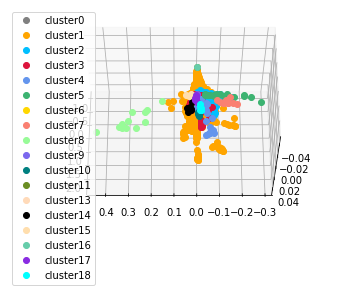

In [ ]:
cluster_20 = AgglomerativeClustering(n_clusters=20, affinity='cosine', linkage='complete')  
cluster_20_lab = cluster_20.fit_predict(data_syn)
colouring(data_syn, cluster_20_lab, outliers = cluster1_ind, components = 3, azim = 300, elev = 0)


In [ ]:
len(set(cluster_20_lab1))

18

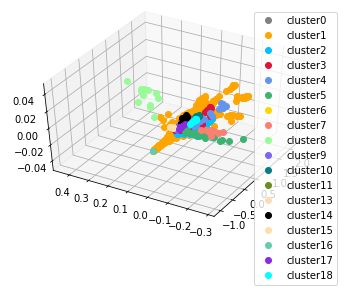

In [ ]:
colouring(data_syn, cluster_20_lab, outliers = cluster1_ind, components = 3, azim = 45, elev = 210)

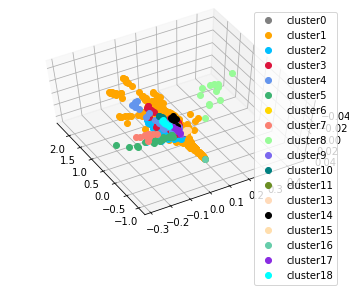

In [ ]:
colouring(data_syn, cluster_20_lab, outliers = cluster1_ind, components = 3, azim = 300, elev = 210)

In [ ]:
y20 = cluster_20_lab
clf20 = NearestCentroid(metric = 'cosine')
clf20.fit(data_syn, y20)

cluster_latent_topic(cl=20, data = data_syn, labels = cluster_20_lab, centroids = clf20.centroids_, ind2word = data_ind, top_n = 10)

/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/_nearest_centroid.py:145: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  warnings.warn("Averaging for metrics other than "


Top 10 words for cluster 0 : ['community', 'volunteer', 'pride', 'constantly', 'citizens', 'eloquent', 'coming', 'kill', 'texaaaas', 'alley']
Top 10 words for cluster 1 : ['consultant', 'noted', 'squid', 'duly', 'vernon', 'conditions', 'progress', 'survey', 'sir', 'cadell']
Top 10 words for cluster 2 : ['reporting', 'hrunzrlzc', 'kepzwggjks', 'zbcmpk', 'oshhohzylpk', 'guidi', 'wwalxfivxs', 'waudby', 'cannons', 'craw']
Top 10 words for cluster 3 : ['fights', 'chases', 'shake', 'copied', 'rooftop', 'scenes', 'became', 'casino', 'bond', 'serious']
Top 10 words for cluster 4 : ['flu', 'gaftcv', 'buhpnbcyaossdkp', 'ujyxvmfsqcrb', 'andgctubuyb', 'q', 'marquee', 'ten', 'respectable', 'encrypted']
Top 10 words for cluster 5 : ['plus', 'find', 'wikipedia', 'lists', 'compass', 'filter', 'diogenes', 'siege', 'moral', 'aaa']
Top 10 words for cluster 6 : ['coaching', 'staff', 'freshmen', 'rio', 'del', 'fresh', 'freshman', 'redshift', 'scary']
Top 10 words for cluster 7 : ['mirror', 'mp', 'nfl', 'cl

In [ ]:
l = s.cluster.hierarchy.linkage(model.wv.syn0, method='complete', metric='cosine')
plt.figure(figsize=(25, 100))
plt.xticks(fontsize = 1)
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('word')
plt.xlabel('distance')

dendrogram(
    l,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=16.,  # font size for the x axis labels
    orientation='left',
    leaf_label_func=lambda v: str(model.wv.index2word[v])
)
plt.show()

In [ ]:
from scipy.cluster.hierarchy import centroid, fcluster
from scipy.spatial.distance import pdist

In [ ]:
a = np.array([[1,1,1],[2,2,2],[0,0,0]])
b = np.array([[1,1,1]]*3)
spatial.distance.cosine(a,b)


ValueError: ignored

In [ ]:
cl_ind = [j for j in range(len(cluster_2_lab)) if cluster_2_lab[j] == 0]
d = model.wv.syn0[cl_ind,]
dtc = cosine_distances(d, [clf.centroids_[0]])
ind = np.argsort(np.squeeze(dtc))[0:24]
w = [model.wv.index2word[k] for k in ind]
print("Top 25 words for cluster", i, ":", w)

Top 25 words for cluster 0 : ['items', 'jump', 'godfather', 'understood', 'escape', 'explains', 'model', 'suit', 'town', 'tannehill', 'trolls', 'written', 'hahahaha', 'lewis', 'cookie', 'ea', 'university', 'sucked', 'drafting', 'young', 'maximum', 'majority', 'machine', 'mole']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  


In [ ]:
[1,2,3,4,5][0:3]

[1, 2, 3]